In [1]:
import numpy as np
import pygad

In [22]:
import networkx as nx
#G = nx.read_edgelist(r"..\vertex_cover_benchmarks\ENZYMES_g102.edges", nodetype=int)
#G = nx.read_edgelist(r"..\vertex_cover_benchmarks\aves-sparrowlyon-flock-season2-unw.edges", nodetype=int)
G = nx.read_edgelist(r"..\vertex_cover_benchmarks\sparrow_unweighted.edges", nodetype=int)

In [20]:
#d = dict(zip(G.nodes(), range(1, 40)))
#G = nx.relabel_nodes(G,d)
#G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40))

In [21]:
#nx.write_edgelist(G, r"..\vertex_cover_benchmarks\sparrow_unweighted_test.edges", data=False)

In [23]:
def subsets(a):
  l = len(a)
  n = l - 1
  x = [0] * n
  f = [j for j in range(l)]
  r = list()
  
  while n:
    m = [0] + x # insert 0 at the beginning of the bit string forms
    subset = [a[i] for i in range(l) if m[i] == 1] # generate the subset
    
    # and use the subset to generate the subsets for when 1 is inserted at the beginning
    k = [a[0]] + subset
    
    r.append(subset) # add to the table all subsets of bits strigs with prefix 0
    r.append(k) # add to the table all subsets of bits strings with prefix 1
    
    # initialization
    # this is where we choose which j we want to change
    j = f[0]
    f[0] = 0
    
    # if j == n we terminate because we have all the possible bit strings
    if j == n:
      break
     
    # update our array when j != n
    f[j] = f[j + 1]
    f[j + 1] = j + 1
    
    x[j] = 1 - x[j] # complement coordinate j and return to line 8 if j != n
  
  return r

In [24]:
import random

def is_cover(sol, G):
    for u, v in G.edges():
        if sol[u - 1] == 0 and sol[v - 1] == 0:
            return False
    return True

def naive_cover(sol, G):
    for u, v in G.edges():
        if sol[u - 1] == 0 and sol[v - 1] == 0:
            node = random.choice([u, v])
            sol[node - 1] = 1
    return

def fitness(sol):
    n = G.order()
    if is_cover(sol, G):
        return n - sum(sol)
    else:
        if sum(sol) >= (2 * n // 3):
            zeros_index = []
            for i in range(len(sol)):
                if sol[i] == 0:
                    zeros_index.append(i)
                    #sol[i] = 1
                    #if is_cover(sol, G):
                    #    print(sol)
                    #    break
                    #sol[i] = 0
            r = subsets(zeros_index)
            r.sort(key=len)
            # r[0] es el conjunto vacío
            for subset in r[1:]:
                for index in subset:
                    sol[index] = 1 # Esto modifica sol porque se pasa por referencia
                if is_cover(sol, G):
                    return n - sum(sol)
                for index in subset:
                    sol[index] = 0
        else:
            naive_cover(sol, G)
            #print("calavera 2")
            return n - sum(sol)

In [10]:
def fit2(sol):
    n = G.order()
    if not is_cover(sol, G):
        naive_cover(sol, G)
    return n - sum(sol)

In [25]:
def fitness_func(ga_instance, solution, solution_idx):
    return fit2(solution)

In [26]:
# GA PARAMETERS

num_generations = 1000
num_parents_mating = 100

gene_space = [0, 1]

fitness_function = fitness_func

sol_per_pop = 100
num_genes = G.order()

init_range_low = 0
init_range_high = 1

parent_selection_type = "tournament"
keep_parents = 0
keep_elitism = 5

crossover_type = "uniform"
crossover_probability = 0.7

mutation_type = "random"
mutation_probability = 0.1

gene_type = int

In [27]:
def on_gen(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

In [28]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       on_generation=on_gen,
                       gene_type=gene_type,
                       keep_elitism=keep_elitism,
                       gene_space=gene_space)

C:\Users\Sara Vicente Arroyo\AppData\Roaming\Python\Python39\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [29]:
def create_instance():
    return pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       on_generation=on_gen,
                       gene_type=gene_type,
                       keep_elitism=keep_elitism,
                       gene_space=gene_space)

In [30]:
output = open(r"..\results\sparrow\GA.csv", "a")
for _ in range(20):
    ga_instance = create_instance()
    ga_instance.run()
    solution, solution_fitness, _ = ga_instance.best_solution()
    output.write(f'{solution},')
    output.write(f'{solution_fitness}\n')
output.close()

Generation :  1
Fitness of the best solution : 8
Generation :  2
Fitness of the best solution : 8
Generation :  3
Fitness of the best solution : 9
Generation :  4
Fitness of the best solution : 9
Generation :  5
Fitness of the best solution : 10
Generation :  6
Fitness of the best solution : 10
Generation :  7
Fitness of the best solution : 10
Generation :  8
Fitness of the best solution : 10
Generation :  9
Fitness of the best solution : 10
Generation :  10
Fitness of the best solution : 10
Generation :  11
Fitness of the best solution : 10
Generation :  12
Fitness of the best solution : 10
Generation :  13
Fitness of the best solution : 10
Generation :  14
Fitness of the best solution : 10
Generation :  15
Fitness of the best solution : 10
Generation :  16
Fitness of the best solution : 10
Generation :  17
Fitness of the best solution : 10
Generation :  18
Fitness of the best solution : 10
Generation :  19
Fitness of the best solution : 10
Generation :  20
Fitness of the best solutio

In [18]:
ga_instance.run()

Generation :  1
Fitness of the best solution : 13
Generation :  2
Fitness of the best solution : 13
Generation :  3
Fitness of the best solution : 13
Generation :  4
Fitness of the best solution : 13
Generation :  5
Fitness of the best solution : 13
Generation :  6
Fitness of the best solution : 13
Generation :  7
Fitness of the best solution : 13
Generation :  8
Fitness of the best solution : 13
Generation :  9
Fitness of the best solution : 13
Generation :  10
Fitness of the best solution : 13
Generation :  11
Fitness of the best solution : 14
Generation :  12
Fitness of the best solution : 14
Generation :  13
Fitness of the best solution : 14
Generation :  14
Fitness of the best solution : 14
Generation :  15
Fitness of the best solution : 14
Generation :  16
Fitness of the best solution : 14
Generation :  17
Fitness of the best solution : 14
Generation :  18
Fitness of the best solution : 14
Generation :  19
Fitness of the best solution : 14
Generation :  20
Fitness of the best sol

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


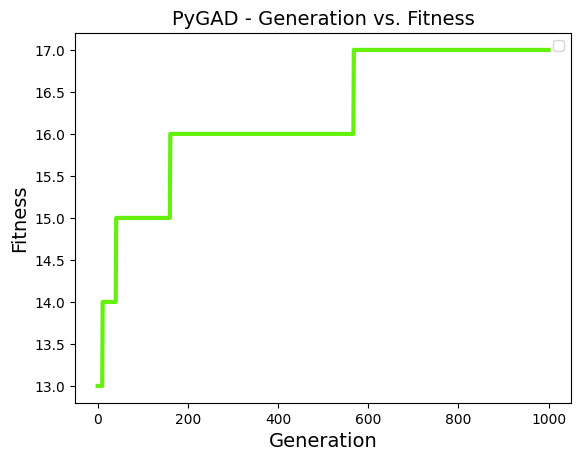

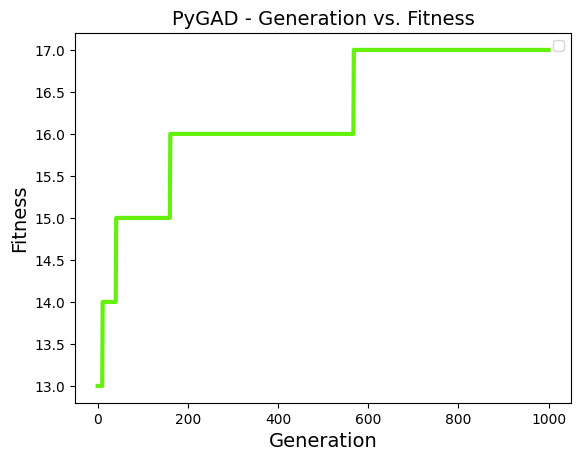

In [19]:
ga_instance.plot_fitness()

In [94]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 0 1 1]
Fitness value of the best solution = 15
Index of the best solution : 0


In [95]:
G = nx.read_weighted_edgelist("aves-sparrowlyon-flock-season2.edges", nodetype=int)

In [96]:
nx.write_edgelist(G, "aves-sparrowlyon-flock-season2-unw.edges", data=False)

In [97]:
G = nx.read_edgelist("aves-sparrowlyon-flock-season2-unw.edges", nodetype=int)

In [98]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=G.order(),
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       on_generation=on_gen,
                       gene_type=gene_type,
                       keep_elitism=keep_elitism,
                       gene_space=gene_space)

In [99]:
ga_instance.run()

Generation :  1
Fitness of the best solution : 11
Generation :  2
Fitness of the best solution : 12
Generation :  3
Fitness of the best solution : 12
Generation :  4
Fitness of the best solution : 12
Generation :  5
Fitness of the best solution : 12
Generation :  6
Fitness of the best solution : 12
Generation :  7
Fitness of the best solution : 12
Generation :  8
Fitness of the best solution : 12
Generation :  9
Fitness of the best solution : 12
Generation :  10
Fitness of the best solution : 12
Generation :  11
Fitness of the best solution : 12
Generation :  12
Fitness of the best solution : 12
Generation :  13
Fitness of the best solution : 12
Generation :  14
Fitness of the best solution : 12
Generation :  15
Fitness of the best solution : 12
Generation :  16
Fitness of the best solution : 12
Generation :  17
Fitness of the best solution : 12
Generation :  18
Fitness of the best solution : 12
Generation :  19
Fitness of the best solution : 12
Generation :  20
Fitness of the best sol

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


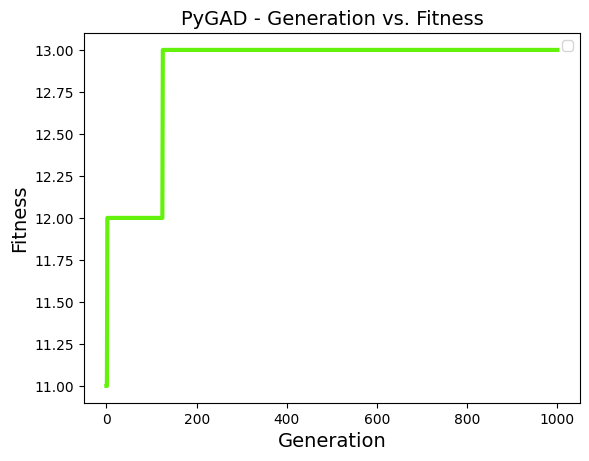

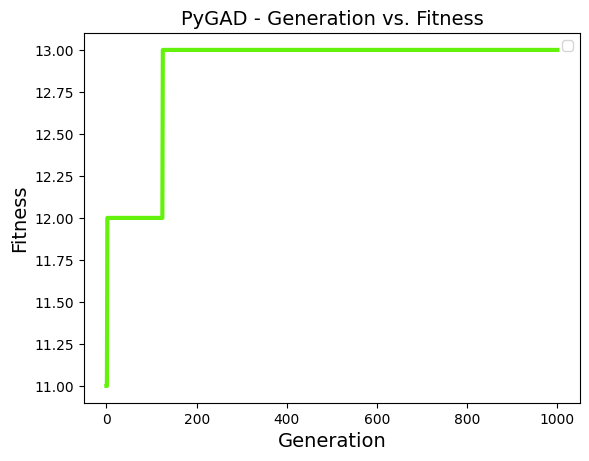

In [100]:
ga_instance.plot_fitness()

In [101]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 1 0 0]
Fitness value of the best solution = 13
Index of the best solution : 0


In [102]:
for _ in range(20):
    ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=G.order(),
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       gene_type=gene_type,
                       keep_elitism=keep_elitism,
                       gene_space=gene_space)
    ga_instance.run()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print(f"Parameters of the best solution : {solution}")
    print(f"Fitness value of the best solution = {solution_fitness}")
    print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 0 0]
Fitness value of the best solution = 13
Index of the best solution : 0
Parameters of the best solution : [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 0 0]
Fitness value of the best solution = 12
Index of the best solution : 0
Parameters of the best solution : [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 0]
Fitness value of the best solution = 12
Index of the best solution : 0
Parameters of the best solution : [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 0 0]
Fitness value of the best solution = 12
Index of the best solution : 0
Parameters of the best solution : [1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 0]
Fitness value of the best solution = 13
Index of the best solution : 0


In [9]:
G = nx.read_edgelist("olaa.edges", nodetype=int)

In [17]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=G.order(),
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       on_generation=on_gen,
                       gene_type=gene_type,
                       keep_elitism=keep_elitism,
                       gene_space=gene_space)

C:\Users\Sara Vicente Arroyo\AppData\Roaming\Python\Python39\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [18]:
ga_instance.run()

Generation :  1
Fitness of the best solution : 11
Generation :  2
Fitness of the best solution : 11
Generation :  3
Fitness of the best solution : 11
Generation :  4
Fitness of the best solution : 13
Generation :  5
Fitness of the best solution : 13
Generation :  6
Fitness of the best solution : 13
Generation :  7
Fitness of the best solution : 13
Generation :  8
Fitness of the best solution : 13
Generation :  9
Fitness of the best solution : 13
Generation :  10
Fitness of the best solution : 13
Generation :  11
Fitness of the best solution : 13
Generation :  12
Fitness of the best solution : 13
Generation :  13
Fitness of the best solution : 13
Generation :  14
Fitness of the best solution : 13
Generation :  15
Fitness of the best solution : 13
Generation :  16
Fitness of the best solution : 13
Generation :  17
Fitness of the best solution : 13
Generation :  18
Fitness of the best solution : 13
Generation :  19
Fitness of the best solution : 13
Generation :  20
Fitness of the best sol

KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


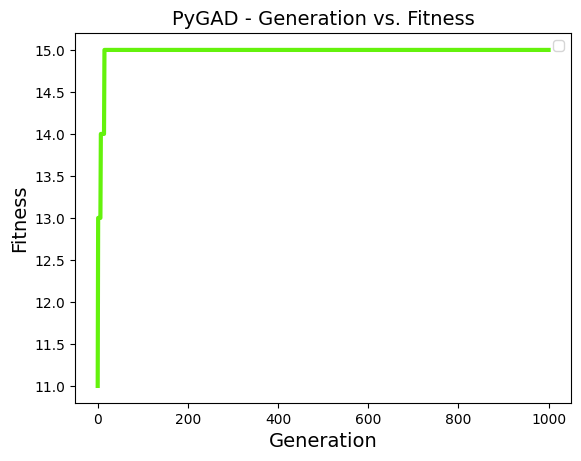

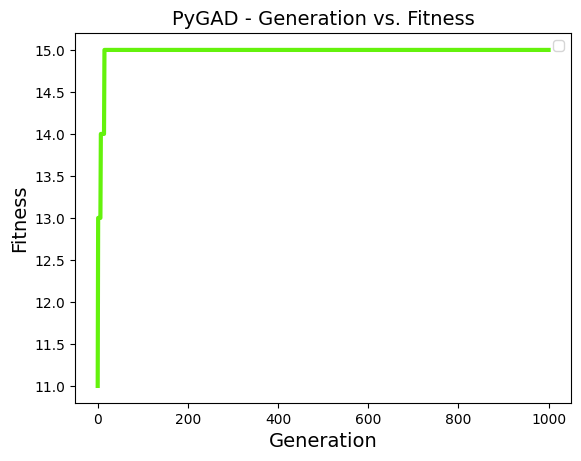

In [14]:
ga_instance.plot_fitness()

In [16]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Fitness value of the best solution = 15
Index of the

In [19]:
G = nx.read_edgelist("brock200_1.edges", nodetype=int)

In [20]:
nx.write_edgelist(nx.complement(G), "brock200_1_complement.edges", data=False)

In [21]:
G = nx.read_edgelist("brock200_1_complement.edges", nodetype=int)

In [24]:
len(G.edges())

5066

In [25]:
# GA PARAMETERS

num_generations = 1000
num_parents_mating = 100

gene_space = [0, 1]

fitness_function = fitness_func

sol_per_pop = 100
num_genes = G.order()

init_range_low = 0
init_range_high = 1

parent_selection_type = "tournament"
keep_parents = 0
keep_elitism = 5

crossover_type = "uniform"
crossover_probability = 0.7

mutation_type = "random"
mutation_probability = 0.1

gene_type = int

In [26]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=G.order(),
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       on_generation=on_gen,
                       gene_type=gene_type,
                       keep_elitism=keep_elitism,
                       gene_space=gene_space)

C:\Users\Sara Vicente Arroyo\AppData\Roaming\Python\Python39\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [27]:
ga_instance.run()

Generation :  1
Fitness of the best solution : 9
Generation :  2
Fitness of the best solution : 9
Generation :  3
Fitness of the best solution : 10
Generation :  4
Fitness of the best solution : 10
Generation :  5
Fitness of the best solution : 10
Generation :  6
Fitness of the best solution : 10
Generation :  7
Fitness of the best solution : 10
Generation :  8
Fitness of the best solution : 10
Generation :  9
Fitness of the best solution : 10
Generation :  10
Fitness of the best solution : 10
Generation :  11
Fitness of the best solution : 11
Generation :  12
Fitness of the best solution : 11
Generation :  13
Fitness of the best solution : 11
Generation :  14
Fitness of the best solution : 11
Generation :  15
Fitness of the best solution : 11
Generation :  16
Fitness of the best solution : 11
Generation :  17
Fitness of the best solution : 11
Generation :  18
Fitness of the best solution : 11
Generation :  19
Fitness of the best solution : 11
Generation :  20
Fitness of the best solut